# Project 3: Diabetes - classification analysis

**Team members: Ronald (leader) & MD Abdullah Al Mamun (assistant)**<br>

### About dataset
Source: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

*This is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in this dataset. This dataset has 21 feature variables*

The data file of the following columns:

**Diabetes_binary (target variable)**
0 = no diabetes 1 = diabetes

**HighBP**
0 = no high BP 1 = high BP

**HighChol**
0 = no high cholesterol 1 = high cholesterol

**CholCheck**
0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

**BMI**
Body Mass Index

**Smoker**
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

**Stroke**
(Ever told) you had a stroke. 0 = no 1 = yes

**HeartDiseaseorAttack**
coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

**PhysActivity**
physical activity in past 30 days - not including job 0 = no 1 = yes

**Fruits**
Consume Fruit 1 or more times per day 0 = no 1 = yes 

**Veggies**
Consume Vegetables 1 or more times per day 0 = no 1 = yes

**HvyAlcoholConsump**
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes

**AnyHealthcare**
Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes

**NoDocbcCost**
Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes

**GenHlth**
Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

**MentHlth**
Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days

**PhysHlth**
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days

**DiffWalk**
Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

**Sex**
0 = female 1 = male

**Age**
13-level age category (AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

**Education**
Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)

**Income**
Income scale (INCOME2 see codebook) scale 1-8. 1 = less than 10k USD; 5 = less than 35k USD; 8 = 75k+ USD 

## Note
The present notebook is focused on classification. EDA etc can be found in another notebook.

## Imports and settings

In [1]:
# general imports
from scipy import stats
from bayes_opt import BayesianOptimization
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from IPython.display import display, Markdown
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV
from skopt.space import Real, Categorical
from collections import defaultdict
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import defaultdict
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.decomposition import PCA
from scipy.stats import sem
from sklearn.preprocessing import StandardScaler
from scipy import stats
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from skopt.space import Real, Categorical, Integer
from math import ceil
from collections import defaultdict
from sklearn.metrics import accuracy_score, confusion_matrix
from skopt import BayesSearchCV
import pprint
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import time
import warnings

# import my personal library
sys.path.insert(0, '../../../ronaldlib/')
import ronaldlib.utils as rutils

# settings
pd.options.display.float_format = "{:.2f}".format
warnings.filterwarnings('ignore', 'The objective has been evaluated ')
warnings.filterwarnings('ignore', 'The max_iter was reached ')
warnings.filterwarnings('ignore', 'The least populated class in ')
warnings.filterwarnings('ignore', 'The total space of parameters ')

# data file
data_file = './data/diabetes_binary_health_indicators_BRFSS2015.csv'
analysis_start_time = time.time()

## Stage 1 (exploration): evaluate various candidate classifiers on small subsets of the data
* By using subsets of the data, this process is quite fast
* The goal here is to find good candidate models and hyperparameter subspaces that we will then investigate in more detail in a fine-tuning stage

loading data from pickle file...
data loaded (took 0.1 seconds)
Explorative run 1...
 model=LogisticRegression, score=0.758, t=3.2 sec
 model=RandomForest, score=0.902, t=5.6 sec
 model=KNeighbors, score=0.853, t=31.1 sec
 model=XGBoost, score=0.874, t=5.3 sec
 model=LightGBM, score=0.902, t=3.4 sec
Explorative run 2...
 model=LogisticRegression, score=0.760, t=0.5 sec
 model=RandomForest, score=0.897, t=3.9 sec
 model=KNeighbors, score=0.843, t=17.4 sec
 model=XGBoost, score=0.897, t=22.0 sec
 model=LightGBM, score=0.895, t=3.3 sec
Explorative run 3...
 model=LogisticRegression, score=0.754, t=3.2 sec
 model=RandomForest, score=0.900, t=3.5 sec
 model=KNeighbors, score=0.892, t=15.8 sec
 model=XGBoost, score=0.889, t=2.0 sec
 model=LightGBM, score=0.883, t=3.2 sec
Explorative run 4...
 model=LogisticRegression, score=0.763, t=2.8 sec
 model=RandomForest, score=0.902, t=9.9 sec
 model=KNeighbors, score=0.825, t=17.5 sec
 model=XGBoost, score=0.898, t=2.6 sec
 model=LightGBM, score=0.90

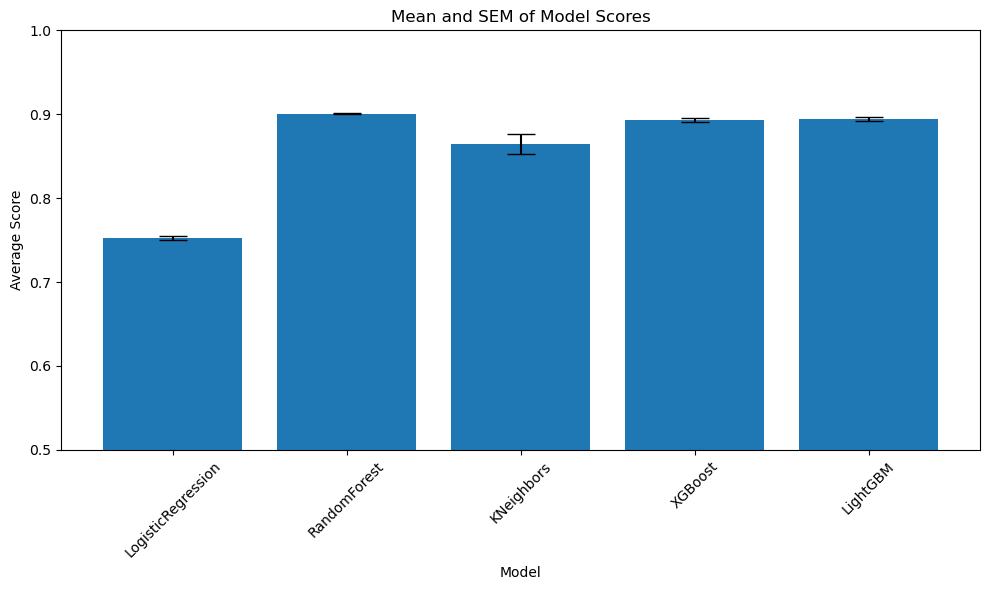


Model with best average score: RandomForest
Average score: 0.9005464899213811
Best parameters: [{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}, {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}, {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}, {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 160, 'bootstrap': True}, {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}, {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 80, 'bootstrap': False}, {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstr

In [ ]:
# load data
df = rutils.load_data(data_file, resave_as_pickle=True)

# settings
target_metric = 'accuracy'
n_iter_randomized_search = 2
n_cv_folds = 5
n_runs = 10
n_samples_per_run = 25000
n_jobs = 6
cv = StratifiedKFold(n_splits=n_cv_folds)

# create a dictionary of models that we will try out
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'KNeighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
}

# define the hyperparameter space for each model 
logisticregression_param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [.0001, .001, .01, .1, 1, 10],
    'solver': ['liblinear']  # 'liblinear' is required for 'l1'
}

randomforest_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 40, 80, 160],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

kneighbors_param_grid = {
    'n_neighbors': list(range(1, 30)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

xgboost_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'colsample_bytree': [0.3, 0.5, 0.7],
    'gamma': [0, 0.1, 0.2]
}

lightgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [-1, 3, 5, 7],
    'num_leaves': [31, 60],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# create a dictionary that maps the model name to the right param grid
param_grid = {
    'LogisticRegression': logisticregression_param_grid,
    'RandomForest': randomforest_param_grid,
    'KNeighbors': kneighbors_param_grid,
    'XGBoost': xgboost_param_grid,
    'LightGBM': lightgbm_param_grid,
}

# initialize dictionaries that will store best scores and parameters
best_scores = defaultdict(list)
best_params = defaultdict(list)

for run in range(n_runs):
    print(f"Explorative run {run+1}...")

    # create train and test data
    df_sample = df.sample(n_samples_per_run)
    X = df_sample.drop('Diabetes_binary', axis=1)
    y = df_sample['Diabetes_binary']

    # get a stratified subsample for each run
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

    # specify column transformer
    binary_cols = [col for col in X_train.columns if X_train[col].nunique() == 2]
    continuous_cols = [col for col in X_train.columns if col not in binary_cols]
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), continuous_cols),
            ('passthrough', 'passthrough', binary_cols)
        ])

    # oversample the minority class
    smote = SMOTE()
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

    # transform the columns
    X_train_res = preprocessor.fit_transform(X_train_res)
    X_test = preprocessor.transform(X_test)
    
    # Determine best performance on this subset for each classifier 
    for model_name, model in models.items():
        # Fit the classifier with RandomizedSearchCV
        start_time = time.time()
        grid_search = RandomizedSearchCV(model, param_grid[model_name], cv=cv, scoring=target_metric, n_iter=n_iter_randomized_search, n_jobs=n_jobs)
        grid_search.fit(X_train_res, y_train_res)

        # Store best score and best parameters for each model
        best_scores[model_name].append(grid_search.best_score_)
        best_params[model_name].append(grid_search.best_params_)
    
        # Print result
        print(f" model={model_name}, score={grid_search.best_score_:.3f}, t={time.time()-start_time:.1f} sec")

# Compute mean scores and SEMs
mean_scores = {model_name: np.mean(scores) for model_name, scores in best_scores.items()}
sem_scores = {model_name: sem(scores) for model_name, scores in best_scores.items()}
best_model_name = max(mean_scores, key=mean_scores.get)

# Make a bar plot
plt.figure(figsize=(10, 6))
model_names = list(mean_scores.keys())
mean_values = list(mean_scores.values())
sem_values = list(sem_scores.values())
plt.bar(model_names, mean_values, yerr=sem_values, capsize=10)
plt.ylabel('Average Score')
plt.xlabel('Model')
plt.title('Mean and SEM of Model Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylim((0.5,1))
plt.show()

# Print info about the best model
print(f"\nModel with best average score: {best_model_name}")
print(f"Average score: {mean_scores[best_model_name]}")
print(f"Best parameters: {best_params[best_model_name]}")

## Stage 2 (fine-tuning): fit the two most promising models to the full data set using Bayesian optimization

In [3]:
# settings
n_cv_folds = 5
n_iter = 200

# (re)load data
df = rutils.load_data(data_file, resave_as_pickle=True)

# create test and train data using the entire dataset
X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# specify column transformer (to scale the continuous features - we don't touch the binary ones)
binary_cols = [col for col in X_train.columns if X_train[col].nunique() == 2]
continuous_cols = [col for col in X_train.columns if col not in binary_cols]
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_cols),
        ('passthrough', 'passthrough', binary_cols)
    ])

# oversample the minority class
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# transform the columns
X_train_res = preprocessor.fit_transform(X_train_res)
X_test = preprocessor.transform(X_test)

most_promising_models = sorted(mean_scores, key=mean_scores.get, reverse=True)[:2]
print(f"Most promising models = {most_promising_models}")
results = {}

for promising_model in most_promising_models:
    explorative_params = best_params[promising_model]

    params_dict = defaultdict(list)

    # Collect all values for each parameter
    for params in explorative_params:
        for key, value in params.items():
            params_dict[key].append(value)

    # build the parameter space based on the results from the exploratory phase
    param_space_bayes = {}
    for key, values in params_dict.items():
        if isinstance(values[0], bool):
            param_space_bayes[key] = Categorical(list(set(values)))
        elif isinstance(values[0], int):
            if key == 'min_samples_split':
                param_space_bayes[key] = Integer(max(2, ceil(min(values)/2)), max(ceil(max(values)*2), max(2, ceil(min(values)/2)) + 1))
            elif key == 'max_depth':
                param_space_bayes[key] = Integer(max(0, ceil(min(values)/2)), max(ceil(max(values)*2), max(0, ceil(min(values)/2)) + 1))
            else:
                if min(values) > 0:
                    if min(values) == max(values):
                        param_space_bayes[key] = Integer(ceil(min(values)/2), max(ceil(max(values)*2), ceil(min(values)/2) + 1), prior='log-uniform')
                    else:
                        param_space_bayes[key] = Integer(max(1, ceil(min(values)/2)), max(ceil(max(values)*2), max(1, ceil(min(values)/2)) + 1), prior='log-uniform')
                else:
                    if min(values) == max(values):
                        param_space_bayes[key] = Integer(ceil(min(values)*2), max(ceil(max(values)*2), ceil(min(values)*2) + 1))
                    else:
                        param_space_bayes[key] = Integer(max(0, ceil(min(values)*2)), max(ceil(max(values)*2), max(0, ceil(min(values)*2)) + 1))
        elif isinstance(values[0], float):
            if key in ['subsample', 'colsample_bytree']:
                param_space_bayes[key] = Real(max(0.0, min(values)/2), min(1.0, max(values)*2), prior='log-uniform')
            else:
                if min(values) > 0:
                    if min(values) == max(values):
                        param_space_bayes[key] = Real(min(values)/2, max(max(values)*2, min(values)/2 + 0.1), prior='log-uniform')
                    else:
                        param_space_bayes[key] = Real(max(0.01, min(values)/2), max(values)*2, prior='log-uniform')
                else:
                    if min(values) == max(values):
                        param_space_bayes[key] = Real(min(values)*2, max(max(values)*2, min(values)*2 + 0.1))
                    else:
                        param_space_bayes[key] = Real(max(0.0, min(values)*2), max(values)*2)
        else:
            param_space_bayes[key] = Categorical(list(set(values)))

    print(f"model={promising_model}, param_space=")
    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(param_space_bayes)
    
    # define and fit the model
    model = models[promising_model]
    searchcv = BayesSearchCV(model, param_space_bayes, scoring=target_metric, cv=n_cv_folds, n_iter=n_iter, n_jobs=n_jobs, verbose=3)
    searchcv.fit(X_train_res, y_train_res)
    
    # store results
    print(f"acc={searchcv.best_score_:.3f}")
    test_predictions = searchcv.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    conf_matrix = confusion_matrix(y_test, test_predictions)
    results[promising_model] = {
        'Best Score': searchcv.best_score_,
        'Best Params': searchcv.best_params_,
        'Test Accuracy': test_accuracy,
        'Confusion Matrix': conf_matrix
    }

# print the results for each model
print("\nFinal results")
print("-------------------")
for model, result in results.items():    
    print(f"Model: {model}")
    print(f"Best score: {result['Best Score']:.3f}")
    print(f"Best params: {result['Best Params']}")
    print(f"Test accuracy: {result['Test Accuracy']:.3f}")
    print(f"Confusion Matrix: \n{result['Confusion Matrix']}\n")

print(f"\nTotal time of the entire anylysis = {(time.time()-analysis_start_time)/60:.1f} minutes")

loading data from pickle file...
data loaded (took 0.0 seconds)
Most promising models = ['RandomForest', 'LightGBM']
model=RandomForest, param_space=
{   'bootstrap': Categorical(categories=(False, True), prior=None),
    'max_depth': Integer(low=10, high=320, prior='uniform', transform='identity'),
    'max_features': Categorical(categories=('sqrt', 'auto'), prior=None),
    'min_samples_leaf': Integer(low=1, high=8, prior='log-uniform', transform='identity'),
    'min_samples_split': Integer(low=2, high=20, prior='uniform', transform='identity'),
    'n_estimators': Integer(low=25, high=400, prior='log-uniform', transform='identity')}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
F